# Spin Wave Simulation

Instrument: ARCS
* Ei=50meV
* Fermi chopper: 360 Hz
* T0: 90Hz
 
Sample: SLAF tetragonal model
* lattice parameters: 5 5 5        90 90 90
* spin wave model available in paper: "Dynamical structure factor of quasi-two-dimensional antiferromagnet in high fields"
* Orientation: u,v = [1 0 2] and  [1 0 0]
* psi angles: -90, 90, step 3


## Step 0. some goodies

In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

## Step 1. create dir structure

In [2]:
# Define which directory to use for my simulation
workdir = "/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/"

In [3]:
# change into primary simulation directory
%cd {workdir}
!ls

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2
samples  scattering


## Step 2. obtain beam simulation

In [20]:
%cd {workdir}/scattering

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering


In [21]:
!ln -s ../../BaFe2Se3_IndependentPlaquettesModel/beam_50meV_1e9_neutrons/ beam

In [22]:
!ls -l

total 512
lrwxrwxrwx 1 p63 users     66 Jun 29 11:06 beam -> ../../BaFe2Se3_IndependentPlaquettesModel/beam_50meV_1e9_neutrons/
-rw-r--r-- 1 p63 users 299854 Jun 29 11:06 SLAF-tetragonal-model.ipynb


In [24]:
!ls -l beam/

total 560
-rw-r--r--   1 p63 users  31009 Jun 29 08:41 50meV_beamProfile.png
-rw-r--r--   1 p63 users  25633 Jun 28 13:23 arcs_moderator2sample.pml
-rw-r--r--   1 p63 users   1591 Jun 29 04:44 log.beam
drwxr-xr-x 102 p63 users   4096 Jun 29 04:44 _m2sout
-rw-r--r--   1 p63 users    476 Jun 29 04:43 mcvine-instruments-arcs-analyze_beam.params
-rw-r--r--   1 p63 users    214 Jun 28 13:23 mcvine-instruments-arcs-beam.params
-rw-r--r--   1 p63 users    319 Jun 28 13:23 mcvine-instruments-arcs-m2s.params
-rw-r--r--   1 p63 users    385 Jun 28 13:23 mcvine-instruments-arcs-mod2sample.params
-rw-r--r--   1 p63 users 230176 Jun 29 04:27 mon1-tof.dat
-rw-r--r--   1 p63 users 231621 Jun 29 04:27 mon2-tof.dat
drwxr-xr-x   3 p63 users   4096 Jun 29 04:44 out
-rw-r--r--   1 p63 users    332 Jun 29 08:41 plotBeamProfile.py
-rw-r--r--   1 p63 users    489 Jun 28 13:23 README.arcs_beam
-rwxr-xr-x   1 p63 users     77 Jun 28 13:22 run-beam-sim.sh
-rw-r--r--   1 p63 users    247 Jun 28 13:23 run-m2s.sh


<IPython.core.display.Javascript object>


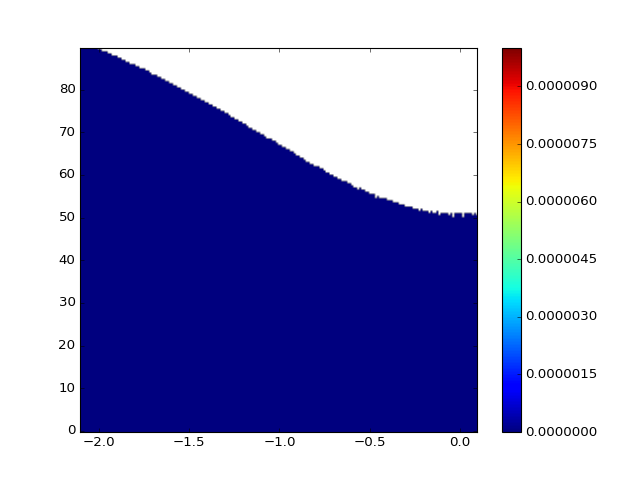

In [26]:
# show beam profile
plt.figure(1)
ie = hh.load("beam/out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Step 3. Check/Update sample assembly

In [27]:
%cd "{workdir}/samples/X/sampleassembly"

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/samples/X/sampleassembly


In [28]:
!cat X.xyz


8
11.89620 0 0    0 5.44930 0    0 0 9.16497
Fe 0.49627 0.99009 0.35234
Fe 0.50373 0.99009 0.64766
Fe 0.00373 0.00991 0.85234
Fe 0.99627 -0.99009 0.14766
Fe 0.50373 0.50991 0.64766
Fe 0.49627 0.50991 0.35234
Fe 0.99627 0.49009 0.14766
Fe 0.00373 0.49009 0.85234


Note:  xyz data only important for phonon scattering (I think)

In [30]:
%%file ./X.xyz
8
5 0 0    0 5 0    0 0 5
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0

Overwriting ./X.xyz


In [29]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=11.89620; b:=5.44930; c:=9.16497; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.1;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=11.89620; b:=5.44930; c:=9.16497; 
    alpha:=0.1; JS:=20; Hnorm:=0.1; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(

In [31]:
%%file ./X-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.1;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=20; Hnorm:=0.1; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(theta))^2; Syoyo:=Syy;
    Szozo:=Sxx*(cos(theta))^2;
    Sxoxo+Syoyo+Szozo"
	Emax="50*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>
    
     <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.1;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=20; Hnorm:=0.1; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(theta))^2; Syoyo:=Syy;
    qxStar:=Qx-pi; qyStar:=Qy-pi; qzStar:=Qz-pi;
    gammaZstar:=cos(qzStar); gammaXYstar:=(cos(qxStar)+cos(qyStar));
    gammaBarStar:=(gammaXYstar+alpha*gammaZstar)/(2.0+alpha);
    AqStar:=2.0*JS*(2.0+alpha)*(1+gammaBarStar*(sin(theta))^2);
    EqStar:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBarStar)*(1-gammaBarStar*cos(2.0*theta)));
    UqSqStar:=(AqStar+EqStar)/(2.0*EqStar); VqSqStar:=(AqStar-EqStar)/(2.0*EqStar);
    UqStar:=sqrt(UqSqStar); VqStar:=sqrt(VqSqStar);
    SxxStar:=(UqStar+VqStar)^2; SyyStar:=(UqStar-VqStar)^2;
    SzozoStar:=SxxStar*(cos(theta))^2;
    Sxoxo+Syoyo+SzozoStar"
	Emax="50*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>   
    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting ./X-scatterer.xml


In [32]:
a,b,c=5,5,5

from numpy import sin, cos, deg2rad
a1 = [a, 0, 0]
a2 = [0, b, 0]
a3 = [0, 0, c]

twopi = 2*np.pi
f = twopi/np.dot(a1, np.cross(a2, a3))
b1 = np.cross(a2,a3) * f
b2 = np.cross(a3,a1) * f
b3 = np.cross(a1,a2) * f
b1,b2,b3

(array([ 1.25663706,  0.        ,  0.        ]),
 array([ 0.        ,  1.25663706,  0.        ]),
 array([ 0.        ,  0.        ,  1.25663706]))

#### Orientation of the kernel
Here we need to use the convention that z is along beam, y vertical up.
The kernel has its own cartesian axis e’x e’y e’z. Because we know
u = 102 v = 100
, we have the basis vectors of the instrument coordinate system

    ez along b1 + 2*b3
    ex along b1
    

So we have them in the reciprocal cartesian axis

In [33]:
ez = b1 + 2*b3; ez /= np.linalg.norm(ez)
ex1 = b1
ey = np.cross(ez, ex1); ey/=np.linalg.norm(ey)
ex = np.cross(ey, ez)
ex, ey, ez

(array([ 0.89442719,  0.        , -0.4472136 ]),
 array([ 0.,  1.,  0.]),
 array([ 0.4472136 ,  0.        ,  0.89442719]))

The rotation matrix is define as
```
    ex.ex’ ex.ey’ ex.ez’ 
R = ey.ex’ ey.ey’ ey.ez’
    ez.ex’ ez.ey’ ez.ez’
```
So

In [34]:
R = np.array([ ex, ey, ez ])
Rflat = R.copy(); Rflat.shape = -1,
R, Rflat

(array([[ 0.89442719,  0.        , -0.4472136 ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.4472136 ,  0.        ,  0.89442719]]),
 array([ 0.89442719,  0.        , -0.4472136 ,  0.        ,  1.        ,
         0.        ,  0.4472136 ,  0.        ,  0.89442719]))

Now we add an extra kernel parameter:

In [35]:
'orientation="%s"' % (','.join(str(e) for e in Rflat),)

'orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"'

In [36]:
# modify X-scatterer.xml to specify the orientation

In [37]:
%%file ./X-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.1;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=20; Hnorm:=0.1; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(theta))^2; Syoyo:=Syy;
    Szozo:=Sxx*(cos(theta))^2;
    Sxoxo+Syoyo+Szozo"
	Emax="50*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>
    
     <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.1;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=20; Hnorm:=0.1; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2.0*Eq);
    Uq:=sqrt(UqSquared); Vq:=sqrt(VqSquared);
    Sxx:=(Uq+Vq)^2; Syy:=(Uq-Vq)^2;
    Sxoxo:=Sxx*(sin(theta))^2; Syoyo:=Syy;
    qxStar:=Qx-pi; qyStar:=Qy-pi; qzStar:=Qz-pi;
    gammaZstar:=cos(qzStar); gammaXYstar:=(cos(qxStar)+cos(qyStar));
    gammaBarStar:=(gammaXYstar+alpha*gammaZstar)/(2.0+alpha);
    AqStar:=2.0*JS*(2.0+alpha)*(1+gammaBarStar*(sin(theta))^2);
    EqStar:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBarStar)*(1-gammaBarStar*cos(2.0*theta)));
    UqSqStar:=(AqStar+EqStar)/(2.0*EqStar); VqSqStar:=(AqStar-EqStar)/(2.0*EqStar);
    UqStar:=sqrt(UqSqStar); VqStar:=sqrt(VqSqStar);
    SxxStar:=(UqStar+VqStar)^2; SyyStar:=(UqStar-VqStar)^2;
    SzozoStar:=SxxStar*(cos(theta))^2;
    Sxoxo+Syoyo+SzozoStar"
	Emax="50*meV"
	orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
	/>   
    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting ./X-scatterer.xml


In [38]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">
    
    <E_vQ_Kernel 
	E_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    h:=a*Qx/twopi; k:=b*Qy/twopi; l:=c*Qz/twopi; alpha:=0.1; JS:=5.0; Hnorm:=0.1;
    theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));"
	S_Q="pi:=3.1415926535897932; twopi:=2*pi; a:=5; b:=5; c:=5; 
    alpha:=0.1; JS:=20; Hnorm:=0.1; theta:=asin(Hnorm);
    gamma_z:=cos(Qz); gamma_xy:=(cos(Qx)+cos(Qy));
    gammaBar:=(gamma_xy+alpha*gamma_z)/(2.0+alpha);
    Aq:=2.0*JS*(2.0+alpha)*(1+gammaBar*(sin(theta))^2);
    Eq:=2.0*JS*(2.0+alpha)*sqrt((1+gammaBar)*(1-gammaBar*cos(2.0*theta)));
    UqSquared:=(Aq+Eq)/(2.0*Eq); VqSquared:=(Aq-Eq)/(2

In [39]:
!ls

sampleassembly.xml  X-scatterer.xml  X.xyz


## Step 4. Scattering

In [40]:
%cd "{workdir}/scattering"

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering


In [42]:
!ls -l

total 320
lrwxrwxrwx 1 p63 users     66 Jun 29 11:06 beam -> ../../BaFe2Se3_IndependentPlaquettesModel/beam_50meV_1e9_neutrons/
-rw-r--r-- 1 p63 users 312404 Jun 29 11:20 SLAF-tetragonal-model.ipynb


In [43]:
!rsync -a ~lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/* ./
!ls

beam  scripts  SLAF-tetragonal-model.ipynb  template


In [44]:
%cd template

!ln -s ../../samples/X/sampleassembly

!ln -s ../beam

%cd ..

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering/template
/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering


In [45]:
%%file sim.yml

cluster:
  nodes: 15
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Writing sim.yml


In [46]:
# Test the simulation for a single angle

In [49]:
!./scripts/sim.py --angle=30.0

SAMPLE_ANGLE=30.0 time ./scatter &> log.scatter
time ./create-nxs &> log.create-nxs

real	1m30.252s
user	15m40.240s
sys	3m8.800s
cp sim.nxs sim-30.0.nxs
mcvine instruments arcs nxs populate_metadata --type=Ei --beam_outdir=beam/out --nxs=sim-30.0.nxs
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)


In [50]:
%%file sim.yml

cluster:
  nodes: 15
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Overwriting sim.yml


In [ ]:
# a script to create a submit script submit.sh
# may need to create several scripts

In [51]:
%%file create-submit.py
import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-submit.py


In [52]:
!cat create-submit.py

import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 3.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

In [53]:
# run the script to create submit.sh
!python ./create-submit.py

In [42]:
# check submit script
#!cat submit.sh

In [54]:
# make sure submit.sh is executable
!chmod +x submit.sh
# and then start it script in the background

In [55]:
%%script bash --bg
./submit.sh
# this will take a while to finish.

Starting job # 0 in a separate thread.


## Step 5. Reduction

In [56]:
%cd "{workdir}/scattering"
!ls

/SNS/users/p63/mcvine/research/SLAF-tetragon-approx2/scattering
beam			     work_-21.0  work_-39.0  work_-6.0	 work_-78.0
create-submit.py	     work_21.0	 work_39.0   work_6.0	 work_78.0
scripts			     work_-24.0  work_-42.0  work_-60.0  work_-81.0
sim.yml			     work_24.0	 work_42.0   work_60.0	 work_81.0
SLAF-tetragonal-model.ipynb  work_-27.0  work_-45.0  work_-63.0  work_-84.0
submit.sh		     work_27.0	 work_45.0   work_63.0	 work_84.0
template		     work_-3.0	 work_-48.0  work_-66.0  work_-87.0
work_0.0		     work_3.0	 work_48.0   work_66.0	 work_87.0
work_-12.0		     work_-30.0  work_-51.0  work_-69.0  work_-9.0
work_12.0		     work_30.0	 work_51.0   work_69.0	 work_9.0
work_-15.0		     work_-33.0  work_-54.0  work_-72.0  work_-90.0
work_15.0		     work_33.0	 work_54.0   work_72.0	 work_90.0
work_-18.0		     work_-36.0  work_-57.0  work_-75.0
work_18.0		     work_36.0	 work_57.0   work_75.0


First we reduce event-mode nexus data for each angle using Mantid

In [57]:
# check if there is reduced data
!ls work_2.0/reduced*

ls: cannot access work_2.0/reduced*: No such file or directory


In [58]:
# reduce tof events to E events
# this takes about 30 minutes
!./scripts/reduce/reduceKeepingEvents_batch.py -90,90.1,3. 100 0,90,0.5 > log.reduce

In [ ]:
# create configuration file for getting a slice

In [49]:
%%file slice_H00.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 3., 3., 3., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 90
 N: 181
Q_projections:
 U:
  proj: 1,0,0
  proj_name: H,0,0
  min: -5
  max: 5
  N: 251
 V:
  proj: 0,1,0
  proj_name: 0,K,0
  min: -1
  max: 1
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -1
  max: 1
  N: 1
output: slice_H00.nxs


Writing slice_H00.yml


In [61]:
# hack for now. copy the config python file to current dir
!cp /SNS/users/lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/scripts/config.py .

In [51]:
# run script to calculate the slice
# this take ~15 minutes 
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_H00.yml > log.slice_H00

In [52]:
# convert slice nexus to slice histogram for plotting
!./scripts/reduce/slice2hist.py slice_H00.nxs slice_H00.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.89 seconds


In [53]:
# plot
H.plot(hh.load("./slice_H00.h5"), min=0, max=1e-5)

/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


plot z in (0, 1e-05)


/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/histogram/data_plotter.py:352: RuntimeWarning: invalid value encountered in less
  negative_median = N.median( z[ z<0 ] )
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/histogram/data_plotter.py:334: RuntimeWarning: invalid value encountered in greater
  positive_median = N.median( z[ z>0 ] )


In [ ]:
# try a smaller range

In [59]:
%%file slice_H00_-2,0.yml

angles: -90,90.1,3.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 3., 3., 3., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 90
 N: 181
Q_projections:
 U:
  proj: 1,0,0
  proj_name: H,0,0
  min: -2.1
  max: 0.1
  N: 201
 V:
  proj: 0,1,0
  proj_name: 0,K,0
  min: -.1
  max: .1
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -1
  max: 1
  N: 1
output: slice_H00_-2__0.nxs


Writing slice_H00_-2,0.yml


In [62]:
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_H00_-2,0.yml > log.slice_H00_-2,0

In [63]:
!./scripts/reduce/slice2hist.py "slice_H00_-2__0.nxs" slice_H00_-2,0.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 1.00 seconds


plot z in (0, 0.0001)


<IPython.core.display.Javascript object>


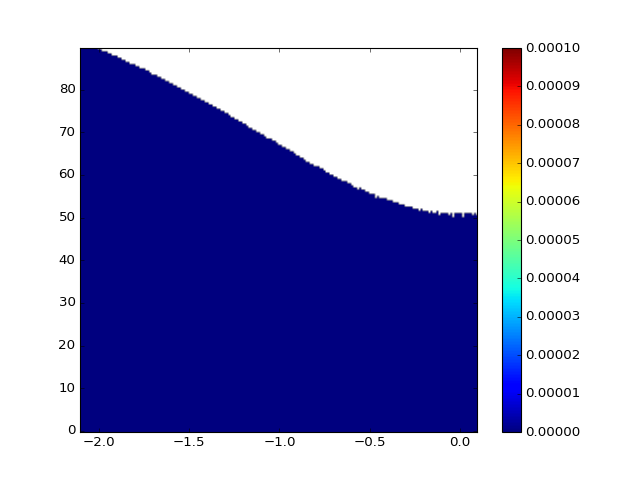

In [67]:
H.plot(hh.load("./slice_H00_-2,0.h5"), min=0, max=1e-4)